# Data query - Chemistry and PatCID

PatCID is a collection of molecular structures to speed up discovery of new molecules, automatically and at scale with Deep Search.
This large-scale collection was created by processing molecular images in United States, European, Japanese, Korean, and Chinese patents.
In this 
We have applied a graph-based visual recognition model to obtain high-precision conversion of these molecular images (MolGrapher, ICCV2023, accepted). Contact us for early access.

In this example we will demonstrate how to interact with Deep Search for
- Querying molecules by similarity or substructure
- Given a list of patents, show the molecules that are mentioned
- Given a list of molecules, list the patents mentioning them


### Access required

The content of this notebook requires access to Deep Search capabilities which are not
available on the public access system.

[Contact us](https://ds4sd.github.io/) if you are interested in exploring
the enterprise-level Deep Search capabilities.

---

### Import example dependencies

In [1]:
# Import standard dependenices
import pandas as pd
import mols2grid
from rdkit import Chem
import json

# IPython utilities
from IPython.display import display, Markdown, HTML, display_html

# Import the deepsearch-toolkit
import deepsearch as ds
from deepsearch.cps.client.api import CpsApi
from deepsearch.cps.client.components.elastic import ElasticDataCollectionSource
from deepsearch.chemistry.queries.molecules import MoleculeQuery, MoleculesInPatentsQuery, PatentsWithMoleculesQuery
from deepsearch.chemistry.queries.molecules import MolId, MolIdType, MolQueryType

from deepsearch.cps.client.components.queries import RunQueryError


### Connect to Deep Search

In [2]:
api = CpsApi.from_env(profile_name="sds")
# api = CpsApi.from_env(profile_name="tchem")


---

## Search molecules

In this section we will perform similarity and substructure searches of molecules.

The `MoleculeQuery` method allows to search the Deep Search knowledge base.
The method requires the following arguments:

- `query`: the SMILES or SMARTS of the molecule to search
- `query_type`: Either `similarity` or `substructure`
- `query_lang`: Either `smiles` (default) or `smarts` for specifying if the `query` is provided as a SMILES or SMARTS string


### Substructure

We will list molecules containing the Squarilium (`C1(C(=C)C([O-])=C1C)=O`) substructure

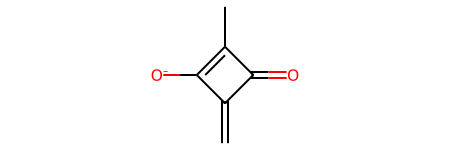

In [3]:
# Substructure example

input_smiles = "C1(C(=C)C([O-])=C1C)=O"

display(Markdown("### Substructure"))
display(Markdown(f"We will list molecules containing the Squarilium (`{input_smiles}`) substructure"))

smiles_mol = Chem.MolFromSmiles(input_smiles)
display(smiles_mol)

In [4]:
# Prepare and run query

query = MoleculeQuery(
    query=input_smiles,
    query_type=MolQueryType.SUBSTRUCTURE,
)

resp = api.queries.run(query)

In [5]:
# Visualize results

results_table = []
for row in resp.outputs["molecules"]:
    result = {
        "id": row["persistent_id"],
        "SMILES": "",
        "InChIKey": "",
        "InChI": "",
    }
    for ref in row["identifiers"]:
        if ref["type"] == "smiles":
            result["SMILES"] = ref["value"]
        if ref["type"] == "inchikey":
            result["InChIKey"] = ref["value"]
        if ref["type"] == "inchi":
            result["InChI"] = ref["value"]
    results_table.append(result)

df = pd.DataFrame(results_table)
display(df)
mols2grid.display(df, smiles_col="SMILES")


,id,SMILES,InChIKey,InChI
0,24705f72fe77c80f3b24c140c8af469501dfc447c66de1...,CCCCB1N=c2c(=C3C(=O)C(c4ccc5cccc6c5c4NB(CCCC)N...,GTJNXUKSVHATHH-UHFFFAOYSA-M,InChI=1S/C32H32B2N4O2/c1-3-5-17-33-35-23-11-7-...
1,390ddd35421438c735ec533d54877a91ce072ba69c3c16...,C[N+]1=C(C=C2C(=O)C(c3c[nH]c4ccccc34)=C2[O-])C...,SLWKWPANYHFRGO-UHFFFAOYSA-N,InChI=1S/C24H19ClN2O2/c1-24(2)17-10-13(25)8-9-...
2,45a170fd713aa1f18823424c3a03a13534c10ed24190c3...,CCc1ccc2c(c1)c(C(C#N)=C1C(=O)C(C(C#N)=C3C=CN(C...,PZIMQVVUBKKIDL-UHFFFAOYSA-N,InChI=1S/C34H27F3N4O2/c1-4-20-7-9-28-24(15-20)...
3,4ff535a52b36a8ecaf6aba3fb83b3918cff2a517a6ee7d...,O=C(CCC(=O)NC1=CC(=[N+]2CCCCC2)C=CC1=C1C(=O)C(...,GVSXHGOKUCLSNT-UHFFFAOYSA-N,InChI=1S/C34H40N6O8/c41-27(11-13-29(43)37-47)3...
4,887cad8fd2ca9c7f8589a15516fd7c2aae5c75f681ee0b...,Cc1ccc(N(CCCC(=O)O)c2ccc(C3=C([O-])C(=C4C=CC(=...,TXPXILPRBVOLFF-UHFFFAOYSA-N,InChI=1S/C40H40N2O8/c1-23-9-15-31(25(3)19-23)4...
5,c4611a10f95e318cf342d8fe0ba19d4781538eeeecb7aa...,CCCCCCCCCCCCC(COC1=CC(=[N+](CCC)CCC)C=C(O)C1=C...,JYEHLZYVGJWKOP-UHFFFAOYSA-N,InChI=1S/C60H100N2O6/c1-11-17-19-21-23-25-26-2...


MolGridWidget()

### Similarity

We will list molecules similiar to Thiamethoxam (`CN1COCN(C1=N[N+](=O)[O-])CC2=CN=C(S2)Cl`)

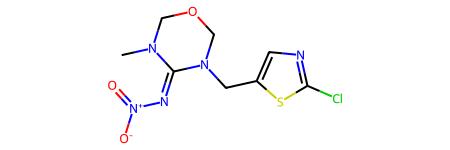

In [6]:
# Similarity example

input_smiles = "CN1COCN(C1=N[N+](=O)[O-])CC2=CN=C(S2)Cl"

display(Markdown("### Similarity"))
display(Markdown(f"We will list molecules similiar to Thiamethoxam (`{input_smiles}`)"))

smiles_mol = Chem.MolFromSmiles(input_smiles)
display(smiles_mol)

In [7]:
# Prepare and run query

query = MoleculeQuery(
    query=input_smiles,
    query_type=MolQueryType.SIMILARITY,
)

resp = api.queries.run(query)

In [8]:
# Visualize results

results_table = []
for row in resp.outputs["molecules"]:
    result = {
        "id": row["persistent_id"],
        "SMILES": "",
        "InChIKey": "",
        "InChI": "",
    }
    for ref in row["identifiers"]:
        if ref["type"] == "smiles":
            result["SMILES"] = ref["value"]
        if ref["type"] == "inchikey":
            result["InChIKey"] = ref["value"]
        if ref["type"] == "inchi":
            result["InChI"] = ref["value"]
    results_table.append(result)

df = pd.DataFrame(results_table)
display(df)
mols2grid.display(df, smiles_col="SMILES")

,id,SMILES,InChIKey,InChI
0,26d9efe2dbe7c22462571b2e9943e79f549d442e6fc249...,CN1CN(C)C(=C[N+](=O)[O-])N(Cc2cnc(Cl)s2)C1,LVUUABLQOQJTGB-UHFFFAOYSA-N,InChI=1S/C10H14ClN5O2S/c1-13-6-14(2)9(5-16(17)...
1,39804dc0bd4410bd26251c2a7545c3a108ce5c71c0446d...,CC(=S)C=C1C=CC=CN1Cc1cnc(Cl)s1,OOHNOWCBAYWPHA-UHFFFAOYSA-N,InChI=1S/C12H11ClN2S2/c1-9(16)6-10-4-2-3-5-15(...
2,4e373f689747ebc3616f594bf68a3fd353e179534945e2...,Cc1ccc(CN2CCN(Cc3cnc(Cl)s3)C2=N[N+](=O)[O-])cc1,DCGQGGBHGYKKJP-UHFFFAOYSA-N,InChI=1S/C15H16ClN5O2S/c1-11-2-4-12(5-3-11)9-1...
3,5ef3bd05d2e4cbf4e1e6eaa9522f12f996a2637f7ae12e...,Cc1cnc(N2CCN(Cc3cnc(Cl)s3)CC2)c(Cl)c1,OAWDCLWJJFFINK-UHFFFAOYSA-N,InChI=1S/C14H16Cl2N4S/c1-10-6-12(15)13(17-7-10...
4,76cac3fcbfefe2f2eaf617acc1e36121a7af69613771b1...,CNC(=C[N+](=O)[O-])N(C)Cc1cnc(Cl)s1,JPVSBPOVISUYJF-UHFFFAOYSA-N,InChI=1S/C8H11ClN4O2S/c1-10-7(5-13(14)15)12(2)...
5,7de0326b89969aaaec51425d3601fc5f1f098694cad224...,CC1COCC(C)N1c1cc(=O)n2c(n1)N(Cc1cnc(Cl)s1)C(C(...,BVPADGBQJMAYQD-UHFFFAOYSA-N,InChI=1S/C18H21ClF3N5O2S/c1-10-8-29-9-11(2)27(...
6,88fea9c711afb1e2081f10c82ade4e961dc44af6f156d5...,O=CC1NCCCN1Cc1cnc(Cl)s1,RPTJNOKADFGOLR-UHFFFAOYSA-N,InChI=1S/C9H12ClN3OS/c10-9-12-4-7(15-9)5-13-3-...
7,9df4c505069ef38dea8b9cc9bcc30dcc6e78a899409380...,O=C(O)CCCN1COCN(Cc2cnc(Cl)s2)C1=N[N+](=O)[O-],DVRKLECABZUPNO-UHFFFAOYSA-N,InChI=1S/C11H14ClN5O5S/c12-10-13-4-8(23-10)5-1...
8,b6caa1d1cc5a16a3271e4b3b2019a16b8d74d8500a2669...,CN(C)C(=O)c1cnc(Cl)s1,QEORGJBVSRYSIZ-UHFFFAOYSA-N,InChI=1S/C6H7ClN2OS/c1-9(2)5(10)4-3-8-6(7)11-4...


MolGridWidget()

---

## List moledules in patents

In this section we will use the `MoleculesInPatentsQuery` method which searches the Deep Search corpus for
listing all molecules contained in the input list of patents.

- `patents`: a list of patent numbers


In [9]:
# Prepare and run query

query = MoleculesInPatentsQuery(
    patents=["US10526338"],
    num_items=20,
)

resp = api.queries.run(query)

In [10]:
# Visualize results

results_table = []
for row in resp.outputs["molecules"]:
    result = {
        "id": row["persistent_id"],
        "SMILES": "",
        "InChIKey": "",
        "InChI": "",
    }
    for ref in row["identifiers"]:
        if ref["type"] == "smiles":
            result["SMILES"] = ref["value"]
        if ref["type"] == "inchikey":
            result["InChIKey"] = ref["value"]
        if ref["type"] == "inchi":
            result["InChI"] = ref["value"]
    results_table.append(result)

df = pd.DataFrame(results_table)
display(df)
mols2grid.display(df, smiles_col="SMILES")

,id,SMILES,InChIKey,InChI
0,51f9d74fd445709dc964850f38995d398c852d0015b417...,CC(C)(c1ccccn1)C(CC(=O)O)Nc1nc(-c2c[nH]c3ncc(C...,JUPUMSRQQQUOLP-UHFFFAOYSA-N,"InChI=1S/C24H20ClFN6O2/c1-24(2,18-5-3-4-6-28-1..."
1,f699d3183c39242199a4598fd771d1eef663a560bbaca5...,Cc1ccc(S(=O)(=O)n2cc(B3OC(C)(C)C(C)(C)O3)c3cnc...,ZYPOBLQBYBAHND-UHFFFAOYSA-N,InChI=1S/C19H22BN3O4S/c1-13-6-8-14(9-7-13)28(2...
2,1f636e508bce7f85945301b24cabbd8614c05a8e9d6f81...,CCOC(=O)CC(Nc1nc(Cl)ncc1F)C(C)(C)c1ccccn1,CXRDUYYPPXCZQP-UHFFFAOYSA-N,InChI=1S/C17H20ClFN4O2/c1-4-25-14(24)9-13(17(2...
3,3243cf17a5235cfd50f8b03af89ab7a3f264a417f054d0...,CCOC(=O)CC(Nc1nc(-c2cn(S(=O)(=O)c3ccc(C)cc3)c3...,ATBXPYKLIPAOJP-UHFFFAOYSA-N,InChI=1S/C30H30FN7O4S/c1-5-42-26(39)14-25(30(3...
4,5c75eb24e823e0bf97f44eab0e2ed5283a9a6731f6e8b9...,CCOC(=O)CC(N)C(C)(C)c1ccccn1,YSJJRYJLMJLXLU-UHFFFAOYSA-N,InChI=1S/C13H20N2O2/c1-4-17-12(16)9-10(14)13(2...
5,c2b8a1d211ec7a77174097a8fa09ea894bdb793fb9defe...,CC(C)(c1ccccn1)C(CC(=O)O)Nc1nc(-c2c[nH]c3ncncc...,DJGLZZCDMMVHRE-UHFFFAOYSA-N,"InChI=1S/C21H20FN7O2/c1-21(2,15-5-3-4-6-24-15)..."
6,dbda28347183c8af83a20552086b4e83a8e1fc72ca8215...,CCOC(=O)CBr,PQJJJMRNHATNKG-UHFFFAOYSA-N,"InChI=1S/C4H7BrO2/c1-2-7-4(6)3-5/h2-3H2,1H3"
7,d04a241fefb2b7fef6ff3a5c0fe26cd19e68a5ff5ae5fd...,CC(C)(C#N)c1ccccn1,SYILGDLWTPODQG-UHFFFAOYSA-N,"InChI=1S/C9H10N2/c1-9(2,7-10)8-5-3-4-6-11-8/h3..."
8,22fdba75ffff1d0bbd280656892df96189447816e8c041...,CCOC(=O)C=C(N)C(C)(C)c1ccccn1,OPXOXVDSPZXHQT-UHFFFAOYSA-N,InChI=1S/C13H18N2O2/c1-4-17-12(16)9-10(14)13(2...
9,fa3e28c7d162138caf73d653a9e187455c434620bb192f...,Fc1cnc(Cl)nc1Cl,WHPFEQUEHBULBW-UHFFFAOYSA-N,InChI=1S/C4HCl2FN2/c5-3-2(7)1-8-4(6)9-3/h1H


MolGridWidget()

---

## List patents containing molecules

In this section we will use the `MoleculesInPatentsQuery` method which searches the Deep Search corpus for
listing all molecules contained in the input list of patents.

- `molecules`: a list of molecule identifiers (SMILES, InChI, InChIKey)


For example, looking for a SMILES is done with
```python
query = PatentsWithMoleculesQuery(
    molecules=[
        MolId(type=MolIdType.SMILES, value="CN1C(=CC2=C([O-])C(=Cc3[se]c4ccccc4[n+]3C)C(=O)C2=O)[Se]c2ccccc21")
    ],
    num_items=20,
)
```



This will look for patents containing


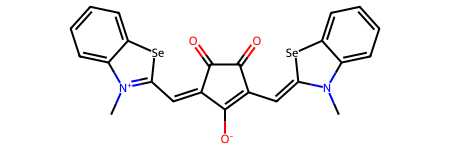

In [11]:
input_smiles = "CN1C(=CC2=C([O-])C(=Cc3[se]c4ccccc4[n+]3C)C(=O)C2=O)[Se]c2ccccc21"

display(Markdown(
    f"""
For example, looking for a SMILES is done with
```python
query = PatentsWithMoleculesQuery(
    molecules=[
        MolId(type=MolIdType.SMILES, value=\"{input_smiles}\")
    ],
    num_items=20,
)
```
"""))

display(Markdown(
"""
This will look for patents containing
"""))

smiles_mol = Chem.MolFromSmiles(input_smiles)
display(smiles_mol)

In [12]:
# Search by SMILES
query = PatentsWithMoleculesQuery(
    molecules=[MolId(type=MolIdType.SMILES, value="CN1C(=CC2=C([O-])C(=Cc3[se]c4ccccc4[n+]3C)C(=O)C2=O)[Se]c2ccccc21")],
    num_items=20,
)

resp = api.queries.run(query)

print("Num matches", len(resp.outputs["patents"]))

for doc in resp.outputs["patents"]:
    for ident in doc["identifiers"]:
        if ident["type"] == "patentid":
            print(ident["value"])

Num matches 1
US5994698


In [13]:
# Search by InChIKey
query = PatentsWithMoleculesQuery(
    molecules=[MolId(type=MolIdType.INCHIKEY, value="LADTZWHJLSOUGG-UHFFFAOYSA-N")],
    num_items=20,
)

resp = api.queries.run(query)

print("Num matches", len(resp.outputs["patents"]))

for doc in resp.outputs["patents"]:
    for ident in doc["identifiers"]:
        if ident["type"] == "patentid":
            print(ident["value"])

Num matches 1
US5994698
